># Project: Investigate a (TMDB Movies) Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Posing Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this analysis I will try to answer some questions regarding our **TMDB Movies** Dataset

## Dataset Columns Description:

**1.id** - Rows unique id

**2.imdb_id** - imdb unique id

**3.popularity** -  A numeric quantity specifying the movie popularity.

**4.budget** - The budget in which the movie was made.

**5.revenue** - The worldwide revenue generated by the movie.

**6.original_title** - The title of the movie before translation or adaptation

**7.cast** - The name of lead and supporting actors.

**8.homepage** -A link to the website of the movie

**9.director** - movie director name

**10.tagline** - Movie's tagline.

**11.keywords** - The keywords or tags related to the movie.

**12.overview** - A brief description of the movie.

**13.runtime** - The running time of the movie in minutes

**14.genres** - The genre of the movie, Action, Comedy ,Thriller etc

**15.production_companies** - name of company that produced movie

**16.release_date** - The date on which the move was released

**17.vote_count** - the count of votes recieved by viewers or reviewers

**18.vote_average** - average ratings the movie recieved.

**19.release_year** - year movie was released

**20.budget_adj**-budget in 2010 dollars,accounting for inflation

**21.revenue_adj** -revenue in 2010 dollars,accounting for inflation


<a id='questions'></a>
## Posing Questions
<ul>
<li><a href="#Q1">Top 10 of the most high rated Movies</a></li>
<li><a href="#Q2">Top 10 of the most popular Movies</a></li>
<li><a href="#Q3">Top 10 of the most apperance actor in movies</a></li>
<li><a href="#Q4">Top 10 of the most directing director in movies</a></li>
<li><a href="#Q5">Top 10 of the most company in produce movies?</a></li>
<li><a href="#Q6">Top 10 of the most movie genere</a></li>
<li><a href="#Q7">Which year has the highest number of movie released ?</a></li>
<li><a href="#Q8">the highest and the lowest movie profit</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





<a id='wrangling'></a>
## Data Wrangling

Let's explore our dataset

In [2]:
# first I will load dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


first number means that our dataset have **10866** rows 
second number means that our dataset have **21** coulmns

In [3]:
# let's discover how many rows and columns in our dataset
df.shape

(10866, 21)

In [4]:
# for more information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning
let's discover nulls and duplicated values and renames columns if necessary

In [5]:
#drop the unused columns from the dataset
df.drop(['imdb_id','homepage','overview', 'budget_adj', 'revenue_adj'],axis =1,inplace =True)

In [6]:
df.shape

(10866, 16)

In [7]:
# view missing value count for each feature
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
# check for duplicate values
sum(df.duplicated())

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
sum(df.duplicated())

0

In [12]:
# creating list which containing zeros
zero_values = ['runtime','budget','revenue']

# replace 0's with Nan value
df[zero_values].replace(0, np.NAN)

# Removing all the row which has Nan value in the list
df.dropna(subset = zero_values, inplace = True)

In [13]:
df.rename(columns={'original_title':'title'},inplace=True)
df.head()

,id,popularity,budget,revenue,title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [14]:
#convert release_date column datatype from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# extract year value from release_date column
df['year'] = pd.DatetimeIndex(df['release_date']).year
# view changes
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
title                           object
cast                            object
director                        object
tagline                         object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
year                             int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


<a id='Q1'></a>
# Which movies had the highest rating or score ?
For me the most important thing I care about movie is the rating of that movie so i'm going to get the top 10 movies with the highest rate although I hava the vote_average and I can use it as the score but using this won't be fair enough since may be I have a movie with high average rating with only 5 votes !! and also I have a movie with less high average rating but with 40 votes!!. So, I'll be using IMDB's weighted rating (wr) which is given as :- 
<p align="center">
    weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:
</p>
                        

* R = average for the movie (mean) = (Rating)
* v = number of votes for the movie = (votes)
* m = minimum votes required to be listed in the Top 250 
* C = the mean vote across the whole report\
 We already have v(vote_count) and R (vote_average) and C can be calculated as:

In [58]:
C=df['vote_average'].mean()
C

6.013383586971981

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the Top 250. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the Top 250 , it must have more votes than at least 90% of the movies in the list which i think it would be fair enough 

In [59]:
m = df['vote_count'].quantile(0.9)
m


790.0

Now, we can filter out the movies that qualify for the list

In [60]:
qualify_movies = df.copy().loc[df['vote_count'] >= m]
qualify_movies.shape

(704, 16)

now I have 704 movies out of 790 that qualify for our criteria\
now let's define a function and calculated weighted_rating() and define a new feature rate

In [61]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [62]:
# Define a new feature 'rate' and calculate its value with `weighted_rating()`
qualify_movies['rate'] = qualify_movies.apply(weighted_rating, axis=1)

In [64]:
#Sort movies based on rate calculated above
qualify_movies = qualify_movies.sort_values('rate', ascending=False)

#Print the top 10 movies
qualify_movies[['title', 'vote_count', 'vote_average', 'rate']]



,title,vote_count,vote_average,rate
4178,The Shawshank Redemption,5754,8.4,8.111885
2875,The Dark Knight,8432,8.1,7.921251
7269,The Godfather,3970,8.3,7.920499
2409,Fight Club,5923,8.1,7.854443
4177,Pulp Fiction,5343,8.1,7.831220
...,...,...,...,...
5502,After Earth,1792,5.1,5.379463
5442,A Good Day to Die Hard,3003,5.2,5.369410
5236,Batman & Robin,828,4.4,5.187746
102,The Boy Next Door,810,3.9,4.943483


Text(0.5, 1.0, 'Top 10 Movies')

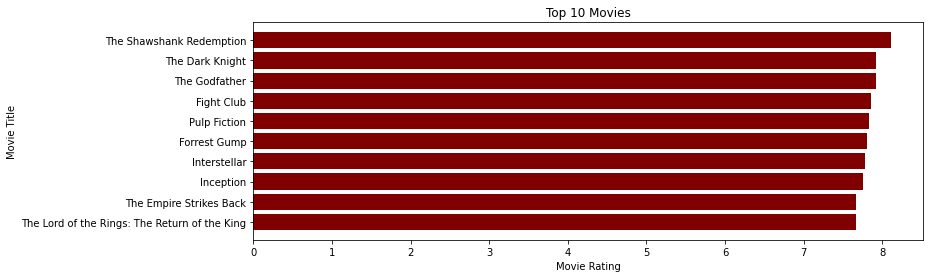

In [71]:
plt.figure(figsize=(12,4))

plt.barh(qualify_movies['title'].head(10),qualify_movies['rate'].head(10), align='center',color='maroon')
plt.gca().invert_yaxis()
plt.ylabel('Movie Title')
plt.xlabel("Movie Rating")
plt.title("Top 10 Movies")

as we can see The Shawshank Redemption is the highest rated movie

<a id='Q2'></a>
# Top 10 of the most popular Movies 

Text(0.5, 1.0, 'Popular Movies')

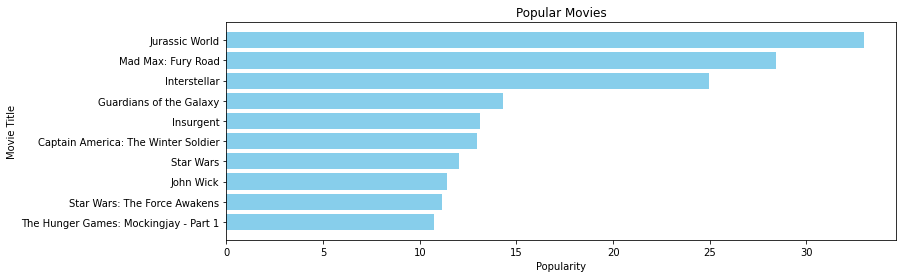

In [72]:
pop = df.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.ylabel('Movie Title')
plt.xlabel("Popularity")
plt.title("Popular Movies")

as we can see Jurassic World is the most popular movie

<a id='Q3'></a>
# Top 10 of the most apperance actor in movies
first we need to extract values from Columns with | separated  

In [15]:
cast = df[df['cast'].str.contains('|')]
key = df[df['keywords'].str.contains('|')]
dir = df[df['director'].str.contains('|')]
gen = df[df['genres'].str.contains('|')]
prod_comp = df[df['production_companies'].str.contains('|')]

after investigation we found that we have 5 columns with 7031 rows with multiple values separated with | so we will extract these values to do our analysis

In [51]:
def extract(col_name):
    column = df[col_name].str.cat(sep="|")
    column = pd.Series(column.split("|")).value_counts().sort_values(ascending=False).head(10)
    # values = column.value_counts(ascending=False).head(10)
    return column

Robert De Niro       63
Bruce Willis         58
Samuel L. Jackson    56
Nicolas Cage         53
Robin Williams       47
Morgan Freeman       44
Tom Hanks            43
Dennis Quaid         41
Michael Caine        40
Liam Neeson          40
dtype: int64

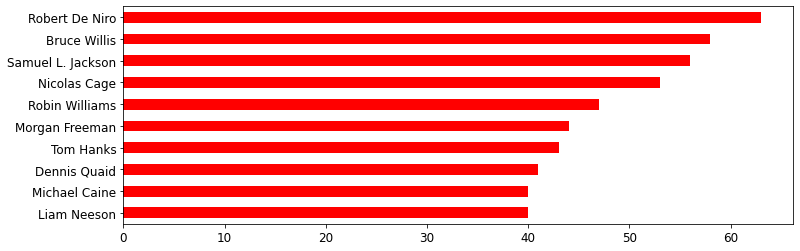

In [67]:
actor = extract('cast')
plt.figure(figsize=(12,4)) 
actor.plot(x="Actor Name", y="Appearance in Movies", kind="barh", fontsize=12, color='red')
plt.gca().invert_yaxis()
actor


as we can see Robert De Niro is the most appearnce actor

<a id='Q4'></a>
# Top 10 of the most directing director in movies

Steven Spielberg     29
Clint Eastwood       27
Martin Scorsese      23
Ridley Scott         22
Ron Howard           22
Woody Allen          22
Steven Soderbergh    20
Barry Levinson       19
Tim Burton           19
Wes Craven           18
dtype: int64

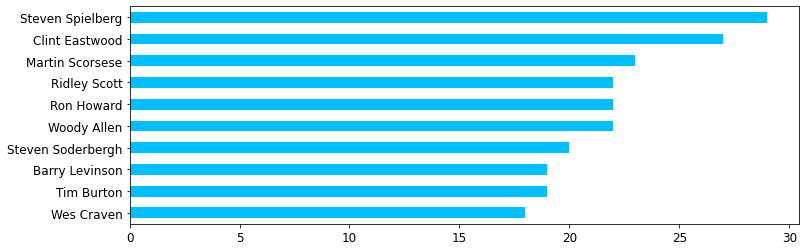

In [61]:
director = extract('director')
plt.figure(figsize=(12,4)) 
director.plot(x='Director Name', y='Directed Movies', kind="barh",fontsize=12,color="deepskyblue")
plt.gca().invert_yaxis()
director

as we can see Steven spielberg has the most directing movies with 29 movies

<a id='Q5'></a>
# Top 10 of the most  company in produce movies?

Warner Bros.                              458
Universal Pictures                        456
Paramount Pictures                        390
Twentieth Century Fox Film Corporation    262
Columbia Pictures                         253
New Line Cinema                           199
Metro-Goldwyn-Mayer (MGM)                 194
Walt Disney Pictures                      159
Touchstone Pictures                       154
Columbia Pictures Corporation             144
dtype: int64

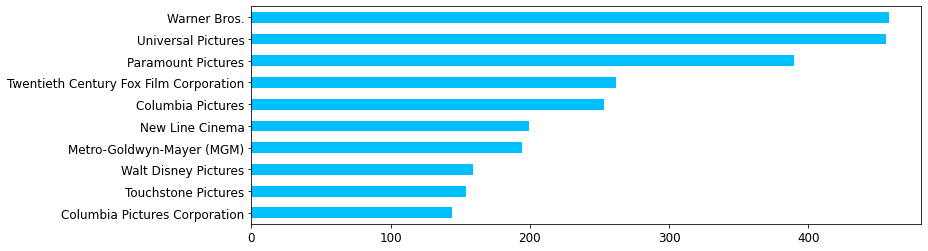

In [62]:
prod_company = extract('production_companies')
plt.figure(figsize=(12,4)) 
prod_company.plot(x='Production Company', y='Number of Movies', kind="barh",fontsize=12,color="deepskyblue")
plt.gca().invert_yaxis()
prod_company

as we can see Warner Bros. is the highest comapny in production movies with 458 movies  

<a id="Q6"></a>
# Top 10 of the most movie genere

Drama              3117
Comedy             2522
Thriller           2140
Action             1753
Horror             1146
Romance            1130
Adventure          1091
Crime              1062
Science Fiction     910
Family              748
dtype: int64

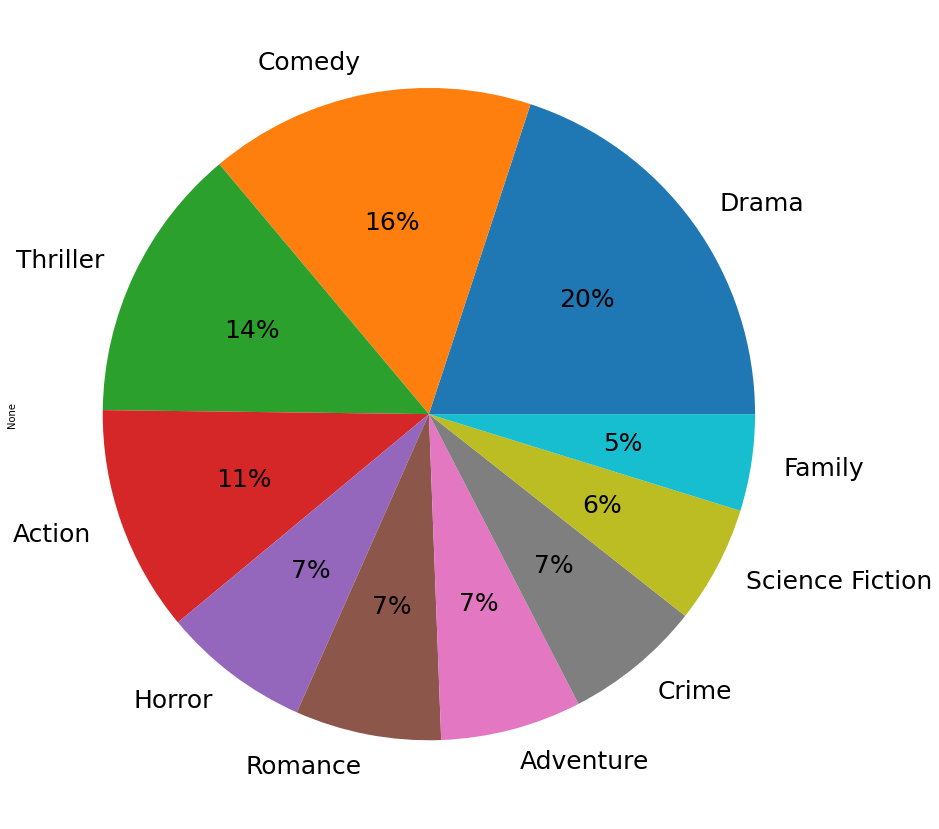

In [68]:
genres = extract('genres')
plt.figure(figsize=(25,15)) 
genres.plot(x='Movie Genre', y='Genre appearence Numbers', kind="pie",fontsize=25, autopct='%1.0f%%')
genres

as we can see that Drama is the most genre movie that has been made 

<a id="Q6"></a>
# Which year has the highest number of movie released ?

In [21]:
released_year = df.groupby('year')['title'].count()
released_year.idxmax()

2014

In [22]:
released_year[2014]

384

In [23]:
released_year.idxmin()

2069

In [24]:
released_year[2069]

19

as we can see 2014 is the most year with highest number of movie released with 384 movies and 2069 is the lowest year with number of movie released with 19 movie

<a id="Q7"></a>
# the highest and the lowest movie profit

In [25]:
df['profit'] = df['revenue'] - df['budget']
movie_reven = df.sort_values(by='profit',ascending=False, inplace=True)
movie_reven

In [26]:
df.head(1)

,id,popularity,budget,revenue,title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2009,2544505847


In [27]:
df.tail(1)

,id,popularity,budget,revenue,title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,assassin|small town|revenge|deception|super speed,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,2010,-413912431


In [ ]:
# plt.figure(figsize=(25,15)) 
# df.plot(x='title', y='profit', kind="bar",fontsize=25,color="deepskyblue")

as we can see that Avatar gets the highest Profit with 2544505847
and The Warrior's Way gets the lowest profit with -413912431

<a id='conclusions'></a>
# Conclusions
> My findings are:

1. like I said movie rating or score is so important to me so I used IMDB weighted rating (WR) to give approx rating and I found that Shawshank Redemption with the heighest rated Movie with (8.1) rate
<br/><br/>

2. second I found that 'Jurassic World' movie was the most popular movie in the list.
<br></br>

3. Third I found that Robert De Niro is the most appearnce actor in movie with 63 movies 
<br/><br/>

4. Forth I found that Steven spielberg has the most directing movies with 29 movies
<br></br>

5. Fifth I found that Warner Bros. is the highest comapny in production movies industry with 458 movies 
<br/><br/>

6. sixth I found that Drama is the most genre movie that has been made with 3117 movie 
<br/><br/>

7. senenth I found that 2014 is the most year with highest number of movie released with 384 movies and 2069 is the lowest year with number of movie released with 19 movie.
<br/><br/>

8. eighth I found that Avatar gets the highest Profit with 2544505847 
and The Warrior's Way gets the lowest profit with -413912431
<br/><br/>


## Limitations
> with so many missing values I had to drop so many rows\
> some columns I didn't understand what is used for or how I can benefit from it\
> I hope that there was a column with awarded like Oscar for actor or director or movie it will be great for me to know the most awarded actor was 